In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.utils import py_random_state
from networkx.generators.random_graphs import _random_subset
import numpy as np
import random

from scipy.optimize import curve_fit

import time
import os

In [2]:
seed = np.random.RandomState()           
time_steps = int(1e4) 
# t0 = time.time()

explorations_per_graph=100

def LinearSearch(lys, element):
    for i in range(len(lys)):
        if lys[i] == element:
            return i
    return -1

#definisco una funzione del grafo per poi fare la media tra grafi differenti

def time_nodes (G, explorations_per_graph):
    initial_node = _random_subset(len(G.nodes), 1, seed).pop()
       
    #dinamica di esplorazione: semplicemente riempio una lista dei nuovi nodi in cui va il walker. Linear search 
    #mi guarda se il nodo è gia presente e non lo aggiunge. Exploration fa un evoluzione temporale restituendo il nuovo nodo
    
    def exploration(initial_node, G, explored_nodes):
        if LinearSearch(explored_nodes, initial_node) < 0:
               explored_nodes += [initial_node]
        neighbours = list(G[initial_node])
        new_node = _random_subset(neighbours, 1, seed).pop()
        return new_node

    exploration_time = []
    explored_nodes = []

    #ripeto l'esplorazione di "time_steps" passi temporali "exploration_per_graph" volte per fare una media - i tempi 
    #di esplorazione variano molto di volta in volta. Semplicemente ogni iterazione mi cambia il nodo iniziale con quello
    #nuovo chiamando la funzione esplorazione. Quando tutti i nodi sono esplorati salvo il tempo impiegato e svuoto il vettore
    #Infine faccio una media dei tempi.
    
    for i in range(explorations_per_graph):
        t = 0
        while True:
            initial_node = exploration(initial_node, G, explored_nodes)
            if len(explored_nodes) == len(G.nodes):
                exploration_time += [t]
             #  print("All nodes explored in ", t , "steps")
                explored_nodes.clear()
                break
            
            if t > time_steps:
                print(f"Exceeded {time_steps} iteration for network exploration")
                break
            t += 1

    mean_exploration_time = sum(exploration_time)/explorations_per_graph
    print("mean_exploration_time: ", mean_exploration_time, "for", len(G.nodes) ,"nodes")

    return mean_exploration_time
    
#print(exploration_time)
#print(explored_nodes) 
#print(len(explored_nodes),"Explored nodes")
     

# print(f"done in {int((time.time()-t0)/60)} minutes and {((time.time()-t0)%60)} seconds")

Exploration for random graph

mean_exploration_time:  210.24 for 20 nodes
mean_exploration_time:  397.64 for 70 nodes
mean_exploration_time:  724.01 for 120 nodes
mean_exploration_time:  1014.52 for 170 nodes
mean_exploration_time:  1443.32 for 220 nodes
mean_exploration_time:  1687.41 for 270 nodes
mean_exploration_time:  2051.46 for 320 nodes
mean_exploration_time:  2408.61 for 370 nodes
mean_exploration_time:  3000.67 for 420 nodes
mean_exploration_time:  3379.66 for 470 nodes
mean_exploration_time:  3689.81 for 520 nodes
mean_exploration_time:  3990.09 for 570 nodes
mean_exploration_time:  4354.37 for 620 nodes
mean_exploration_time:  4914.38 for 670 nodes
mean_exploration_time:  5229.98 for 720 nodes
mean_exploration_time:  5444.95 for 770 nodes
mean_exploration_time:  5864.53 for 820 nodes
Exceeded 10'000 iteration for network exploration
Exceeded 10'000 iteration for network exploration
mean_exploration_time:  6103.93 for 870 nodes
Exceeded 10'000 iteration for network exploration
Exceeded 10'000 iteration f

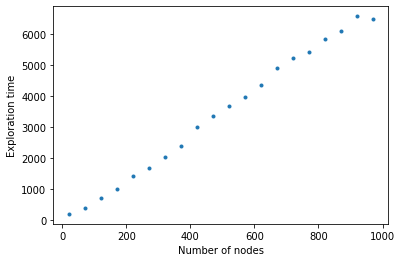

In [3]:
N = [20+i*50 for i in range(20)] #vettore dei nodi dei diversi grafi
P = 0.25
Times = []

#per ogni N creo un grafo e faccio una media dei tempi di esplorazione che plotto in funzione di N    
for i in range(len(N)):
    G = nx.erdos_renyi_graph(N[i], P)
    while min([d for n, d in G.degree()]) == 0:
          G = nx.erdos_renyi_graph(N[i], P)
    Times += [time_nodes(G, explorations_per_graph)]  

fig, ax = plt.subplots()
    
ax.plot(N, Times, '.', label = 'exploration_time')
ax.set_xlabel("Number of nodes")
ax.set_ylabel("Exploration time")

plt.show()

Exploration for scale-free graph

mean_exploration_time:  109.77 for 20 nodes
mean_exploration_time:  205.26 for 30 nodes
mean_exploration_time:  302.33 for 40 nodes
mean_exploration_time:  390.77 for 50 nodes
mean_exploration_time:  539.06 for 60 nodes
mean_exploration_time:  614.14 for 70 nodes
mean_exploration_time:  787.56 for 80 nodes
mean_exploration_time:  862.14 for 90 nodes
mean_exploration_time:  989.75 for 100 nodes
mean_exploration_time:  1081.36 for 110 nodes
mean_exploration_time:  1264.32 for 120 nodes
mean_exploration_time:  1390.93 for 130 nodes
mean_exploration_time:  1536.53 for 140 nodes
mean_exploration_time:  1690.33 for 150 nodes
mean_exploration_time:  1823.04 for 160 nodes
mean_exploration_time:  1958.43 for 170 nodes
mean_exploration_time:  2432.73 for 180 nodes
mean_exploration_time:  2200.94 for 190 nodes
mean_exploration_time:  2274.85 for 200 nodes
mean_exploration_time:  2446.52 for 210 nodes


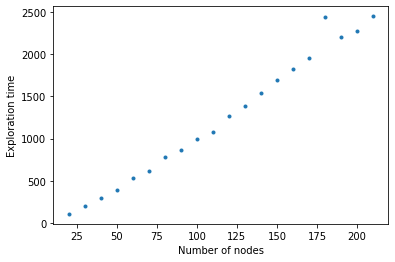

In [4]:
N = [20+i*10 for i in range(20)]
M = 3
Times = []

for i in range(len(N)):
    G = nx.barabasi_albert_graph(N[i], M)
    Times += [time_nodes(G,explorations_per_graph)]  

fig, ax = plt.subplots()
    
ax.plot(N, Times, '.', label = 'exploration_time')
ax.set_xlabel("Number of nodes")
ax.set_ylabel("Exploration time")

plt.show()